# IED distributions during flicker sessions

### Sina Dabiri


In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import os

## 1. select which subject's data to use
Check excel sheet to see which subjects to include in IED histogram analysis
FlickerStudyMetadata.xlsx

In [2]:
path="Y:\FlickerStudyMetadata.xlsx"
FlickerStudy_df = pd.read_excel(path)

FileNotFoundError: [Errno 2] No such file or directory: 'Y:\\FlickerStudyMetadata.xlsx'

In [6]:
FlickerStudy_df.head()

,Subject_ID,Experiment,Session,Session_version,Completed?,Number of sessions within experiment,Include in analysis?,Brightness lux 1 (40Hz AV)- left,Brightness lux 2 (40Hz AV)- right,Average brightness,Volume dBA 1 (40Hz AV)- left,Volume dBA 2 (40Hz AV)- right,Average Volume,Did occluded?,Single unit recording?,Number of single units,Location of single units,"AEDs taken on day of testing, before testing",Relevant notes
0,FL000,flickerneuro,1,NaN,1,6,1,162,163,162.5,73.9,77.2,75.55,1,0,NaN,NaN,Lamotrigine (300mg); Levetiracetam (750mg); Zo...,Occluded condition was 40Hz-AV; any other notes?
1,FL001,flickerneuro,1,NaN,1,6,1,200,197,198.5,81.4,83.5,82.45,0,1,11,"mid-hippocampus, posterior-cingulate",Lamotrigine (300mg); Levetiracetam (2000mg); T...,NaN
2,FL002,flickerneuro,1,NaN,1,6,1,13,14,13.5,82.4,83.4,82.90,1,0,NaN,NaN,Lamotrigine (200mg).,NaN
3,FL003,flickerneuro,1,NaN,1,6,1,48,50,49.0,79.1,77.5,78.30,1,0,NaN,NaN,Lamotrigine (75mg); Levetiracetam (250mg).,NaN
4,FL003,spep,1,NaN,1,NaN,1,709,720,714.5,91.7,93.4,92.55,1,0,NaN,NaN,None.,NaN


In [7]:
# Filtering for subjects to include in analysis 
sessions = FlickerStudy_df.loc[FlickerStudy_df['Include in analysis?']>0 ,['Subject_ID','Experiment','Session']]
sessions_flickerneuro = sessions.loc[FlickerStudy_df['Experiment']=='flickerneuro']
sessions_flickerneuro


,Subject_ID,Experiment,Session
0,FL000,flickerneuro,1
1,FL001,flickerneuro,1
2,FL002,flickerneuro,1
3,FL003,flickerneuro,1
6,FL005,flickerneuro,1
9,FL007,flickerneuro,1
12,FL009,flickerneuro,1
14,FL010,flickerneuro,1
15,FL011,flickerneuro,1
17,FL012,flickerneuro,1


## 2. Import "All spike" tables for each session into conda dataframe


In [8]:
rows, col = sessions_flickerneuro.shape
rows

14

In [9]:
# loop through to get all of the paths to the "All spike" xl files

IED_path=[""]*rows
for p in range(rows):
    idx = sessions_flickerneuro.index[p]
    subject_path = str(sessions_flickerneuro.loc[idx,'Subject_ID'])+ "/task-flickerneuro/ses-0" + str(sessions_flickerneuro.loc[idx,'Session'])
    IED_path[p]= "Y:/stg-preproc/sub-"+ subject_path + "/IED-preproc/"

In [10]:
IED_path

['Y:/stg-preproc/sub-FL000/task-flickerneuro/ses-01/IED-preproc/',
 'Y:/stg-preproc/sub-FL001/task-flickerneuro/ses-01/IED-preproc/',
 'Y:/stg-preproc/sub-FL002/task-flickerneuro/ses-01/IED-preproc/',
 'Y:/stg-preproc/sub-FL003/task-flickerneuro/ses-01/IED-preproc/',
 'Y:/stg-preproc/sub-FL005/task-flickerneuro/ses-01/IED-preproc/',
 'Y:/stg-preproc/sub-FL007/task-flickerneuro/ses-01/IED-preproc/',
 'Y:/stg-preproc/sub-FL009/task-flickerneuro/ses-01/IED-preproc/',
 'Y:/stg-preproc/sub-FL010/task-flickerneuro/ses-01/IED-preproc/',
 'Y:/stg-preproc/sub-FL011/task-flickerneuro/ses-01/IED-preproc/',
 'Y:/stg-preproc/sub-FL012/task-flickerneuro/ses-01/IED-preproc/',
 'Y:/stg-preproc/sub-FL014/task-flickerneuro/ses-01/IED-preproc/',
 'Y:/stg-preproc/sub-FL014/task-flickerneuro/ses-02/IED-preproc/',
 'Y:/stg-preproc/sub-FL016/task-flickerneuro/ses-01/IED-preproc/',
 'Y:/stg-preproc/sub-FL021/task-flickerneuro/ses-01/IED-preproc/']

In [11]:
# Import subject's Excel file
sessions = np.arange(0,rows)
sessions
# TODO: a loop to get all of the session paths.

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [12]:
session_path=IED_path[0]+'sub-'+ str(sessions_flickerneuro.loc[0,'Subject_ID'])+'_allspikes.csv'
session_path

'Y:/stg-preproc/sub-FL000/task-flickerneuro/ses-01/IED-preproc/sub-FL000_allspikes.csv'

In [13]:
session_path_win = os.path.abspath(session_path)
session_path_win

'Y:\\stg-preproc\\sub-FL000\\task-flickerneuro\\ses-01\\IED-preproc\\sub-FL000_allspikes.csv'

In [14]:
os.path.exists(session_path_win)

True

In [15]:
session_df = pd.read_csv(session_path_win)
session_df

,clip_ids,clip,subject,start,chan,predicted_class
0,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_233_5,FL000,233,5,0
1,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_4503_51,FL000,4503,51,0
2,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_5723_10,FL000,5723,10,0
3,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_6062_62,FL000,6062,62,1
4,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_6066_65,FL000,6066,65,0
...,...,...,...,...,...,...
8268,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1311968_5,FL000,1311968,5,1
8269,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1311982_5,FL000,1311982,5,0
8270,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1311998_5,FL000,1311998,5,1
8271,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1311999_6,FL000,1311999,6,1


### 2.1: filter out false positive IED events: 0 is true IED 1 is False positive

In [16]:
session_df_tp = session_df[session_df['predicted_class']==0]
session_df_tp

,clip_ids,clip,subject,start,chan,predicted_class
0,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_233_5,FL000,233,5,0
1,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_4503_51,FL000,4503,51,0
2,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_5723_10,FL000,5723,10,0
4,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_6066_65,FL000,6066,65,0
5,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_6066_66,FL000,6066,66,0
...,...,...,...,...,...,...
8259,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1296284_5,FL000,1296284,5,0
8261,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1302343_4,FL000,1302343,4,0
8264,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1305562_99,FL000,1305562,99,0
8266,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1306738_5,FL000,1306738,5,0


### 2.2: filter out overlapping IED events within 100 msec
- fs = 200 Hz -> ts = 5 mses
- 100 msec/5 msec = 20 samples
- next IED start >= 20 samples 

In [17]:
session_df_tp.head(10)

,clip_ids,clip,subject,start,chan,predicted_class
0,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_233_5,FL000,233,5,0
1,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_4503_51,FL000,4503,51,0
2,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_5723_10,FL000,5723,10,0
4,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_6066_65,FL000,6066,65,0
5,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_6066_66,FL000,6066,66,0
6,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_6068_63,FL000,6068,63,0
7,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_6645_52,FL000,6645,52,0
8,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_6645_51,FL000,6645,51,0
9,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_6645_50,FL000,6645,50,0
10,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_7946_38,FL000,7946,38,0


In [18]:
# write a for loop to only keep IED with start time >20 sample later 
m, n = session_df_tp.shape
print(m)
true_IEDs = np.zeros((m,2),dtype=int);
true_IEDs_df = pd.DataFrame({"start":[session_df_tp.at[0,'start']],
                            "chan":[session_df_tp.at[0,'chan']]})
true_IEDs[0,:] = [session_df_tp.at[0,'start'],session_df_tp.at[0,'chan']]
i = 1
for ied in range(1,m):
    idx = session_df_tp.index.values[ied]
    # print(idx)
    if (idx and idx+1) in session_df_tp.index:
        
        if (int(session_df_tp.loc[[idx], 'start']+20) < int(session_df_tp.loc[[idx+1], 'start'])):
            true_IEDs[i,:] = [session_df_tp.loc[idx,'start'],session_df_tp.loc[idx,'chan']]
            i=  i+1
            #true_IEDs_df.
        else:
            ied = ied+1
        

3019


In [19]:
print(true_IEDs.shape)
true_IEDs[0:10,:]

(3019, 2)


array([[  233,     5],
       [ 4503,    51],
       [ 6068,    63],
       [ 6645,    50],
       [ 7946,    38],
       [23647,    38],
       [27313,    51],
       [29563,    44],
       [33642,    65],
       [34898,    57]])

In [20]:
true_IEDs_df = pd.DataFrame(true_IEDs,columns=['start','chan'])
true_IEDs_df

,start,chan
0,233,5
1,4503,51
2,6068,63
3,6645,50
4,7946,38
...,...,...
3014,0,0
3015,0,0
3016,0,0
3017,0,0


In [21]:
#filter out the zero values
true_IEDs_df_clean= true_IEDs_df[true_IEDs_df['chan']!=0]
true_IEDs_df_clean

,start,chan
0,233,5
1,4503,51
2,6068,63
3,6645,50
4,7946,38
...,...,...
586,1264602,83
587,1282426,82
588,1293126,86
589,1294888,87


### 2.3: calculate the IED rate and append to true_IEDs_df

In [22]:
# fs=200 Hz, so to convert samples to rate IED/min: 200*60 sec = 12000, need to calculate the global number of IEDs from all channels every 12000 samples
time = true_IED[-1,0]
time

In [18]:
true_IEDs_df[true_IEDs_df['chan']==42]

,start,chan


In [19]:
count = np.count_nonzero(true_IEDs_df[true_IEDs_df['chan']==42])
count

0

##  3. Plot histograms with different time size bins for each session


<Axes: xlabel='start', ylabel='chan'>

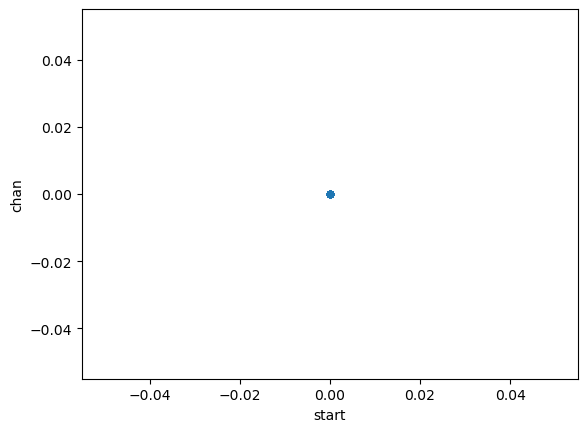

In [20]:
true_IEDs_df.plot.scatter(x='start',y='chan')

In [21]:
true_IEDs_df[true_IEDs_df['chan']==42].plot.line(x='start',y=);

SyntaxError: invalid syntax (2885502373.py, line 1)

## 4. convert each step into a function and run in a loop for all of the selected subject's sessions
